# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Set up

In [2]:
colors = sns.set_palette("RdPu", 9)
sns.set_theme(style = "white", palette = colors, font = "arial")

#  Data Loading and Inspection

# Data Link
https://www.tableau.com/learn/articles/free-public-data-sets#health#U.S.-County-ealth-Rankings


In [3]:
df = pd.read_csv('County_Health_Rankings.csv')

# About the data
The dataset “County Health Rankings” provides public health data across U.S. states and counties. Each row represents a health-related measure (indicator) recorded for a given county and time span. The dataset contains over 300,000 observations.

# Columns Overview:

State / County: Names of U.S. states and counties.

State code / County code / fipscode: Identifiers for states and counties.

Year span: The time period during which the measure was collected (e.g., 2008–2010).

Measure name: The specific health indicator (e.g., Children in poverty, Adult smoking, Violent crime rate).

Measure id: A numeric code for each health indicator.

Numerator: The number of individuals in the county who meet the condition of the measure (e.g., number of children in poverty).

Denominator: The total population considered for that measure (e.g., total children in the county).

Raw value: The calculated result of the measure, usually a percentage or rate (Numerator ÷ Denominator)

In [4]:
df.head()

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,Confidence Interval Lower Bound,Confidence Interval Upper Bound,Data Release Year,fipscode
0,US,United States,0.0,0.0,2003-2005,Violent crime rate,43.0,1328750.667,274877117.0,483.398066,NaN,NaN,NaN,0.0
1,US,United States,0.0,0.0,2004-2006,Violent crime rate,43.0,1340928.667,277612778.5,483.021233,NaN,NaN,NaN,0.0
2,US,United States,0.0,0.0,2005-2007,Violent crime rate,43.0,1355853.167,280407694.7,483.529230,NaN,NaN,2010.0,0.0
3,US,United States,0.0,0.0,2006-2008,Violent crime rate,43.0,1366928.333,287614567.7,475.263942,NaN,NaN,2011.0,0.0
4,US,United States,0.0,0.0,2007-2009,Violent crime rate,43.0,1339439.333,292576281.2,457.808585,NaN,NaN,2012.0,0.0


In [5]:
df.shape

(303864, 14)

In [6]:
df.dtypes

State                               object
County                              object
State code                         float64
County code                        float64
Year span                           object
Measure name                        object
Measure id                         float64
Numerator                          float64
Denominator                        float64
Raw value                          float64
Confidence Interval Lower Bound    float64
Confidence Interval Upper Bound    float64
Data Release Year                  float64
fipscode                           float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303864 entries, 0 to 303863
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   State                            303858 non-null  object 
 1   County                           303858 non-null  object 
 2   State code                       303860 non-null  float64
 3   County code                      303860 non-null  float64
 4   Year span                        303390 non-null  object 
 5   Measure name                     303390 non-null  object 
 6   Measure id                       303390 non-null  float64
 7   Numerator                        214076 non-null  float64
 8   Denominator                      184779 non-null  float64
 9   Raw value                        289956 non-null  float64
 10  Confidence Interval Lower Bound  189412 non-null  float64
 11  Confidence Interval Upper Bound  189412 non-null  float64
 12  Da

In [8]:
df.describe(include = 'number')

,State code,County code,Measure id,Numerator,Denominator,Raw value,Confidence Interval Lower Bound,Confidence Interval Upper Bound,Data Release Year,fipscode
count,303860.000000,303860.000000,303390.000000,2.140760e+05,1.847790e+05,289956.000000,189412.000000,189412.000000,150129.000000,294283.000000
mean,30.351807,101.981422,38.699071,1.253031e+04,1.354018e+05,1075.912013,1348.410687,1851.042897,2012.256280,30456.873139
std,15.238258,107.824989,36.791425,3.516778e+05,3.666322e+06,2851.499091,2902.214152,3998.423557,1.312575,15258.982388
min,0.000000,0.000000,1.000000,0.000000e+00,1.000000e+01,0.000000,0.000000,0.000000,2010.000000,0.000000
25%,18.000000,33.000000,7.000000,2.180000e+02,2.127000e+03,0.200000,0.183425,0.277939,2011.000000,18179.000000
50%,29.000000,77.000000,24.000000,8.190000e+02,8.446023e+03,0.585000,0.278000,0.400000,2012.000000,29183.000000
75%,45.000000,133.000000,50.000000,2.686000e+03,2.822000e+04,91.082228,62.000000,77.000000,2013.000000,45087.000000
max,72.000000,840.000000,125.000000,6.214471e+07,6.026833e+08,32810.400000,23917.100000,46148.300000,2014.000000,72153.000000


In [9]:
df.describe(include = 'object')


,State,County,Year span,Measure name
count,303858,303858,303390,303390
unique,53,2008,26,12
top,TX,Washington County,2008,Children in poverty
freq,24225,2850,31927,41499


# Cleaning The Data

# Transforming Columns

In [10]:
State_code = df['State code'] = df['State code'].astype('object')
df['State code'] = State_code

County_code = df['County code'] = df['County code'].astype('object')
df['County code'] = County_code

Measure_id = df['Measure id'].astype('object')
df['Measure id'] = Measure_id


fipscode = df['fipscode'].astype('object')
df['fipscode'] = fipscode 

df.dtypes

State                               object
County                              object
State code                          object
County code                         object
Year span                           object
Measure name                        object
Measure id                          object
Numerator                          float64
Denominator                        float64
Raw value                          float64
Confidence Interval Lower Bound    float64
Confidence Interval Upper Bound    float64
Data Release Year                  float64
fipscode                            object
dtype: object

# Dublication

In [11]:
df.duplicated().sum()

np.int64(6793)

In [12]:
df.duplicated(subset = ['State', 'County', 'Measure name', 'Year span', 'Data Release Year']).sum()

np.int64(6875)

In [13]:
df = df.drop_duplicates(subset = ['State', 'County', 'Measure name', 'Year span', 'Data Release Year'])
df.shape

(296989, 14)

# Missing Values

In [14]:
df.isnull().sum()

State                                   5
County                                  5
State code                              4
County code                             4
Year span                              79
Measure name                           79
Measure id                             79
Numerator                           89362
Denominator                        112272
Raw value                           13503
Confidence Interval Lower Bound    114025
Confidence Interval Upper Bound    114025
Data Release Year                  146905
fipscode                             9578
dtype: int64

In [15]:
null_percenage = df.isnull().mean()  * 100
print(f" The pecenage of null values in each column:\n {null_percenage}")

 The pecenage of null values in each column:
 State                               0.001684
County                              0.001684
State code                          0.001347
County code                         0.001347
Year span                           0.026600
Measure name                        0.026600
Measure id                          0.026600
Numerator                          30.089330
Denominator                        37.803420
Raw value                           4.546633
Confidence Interval Lower Bound    38.393678
Confidence Interval Upper Bound    38.393678
Data Release Year                  49.464795
fipscode                            3.225035
dtype: float64


<Axes: >

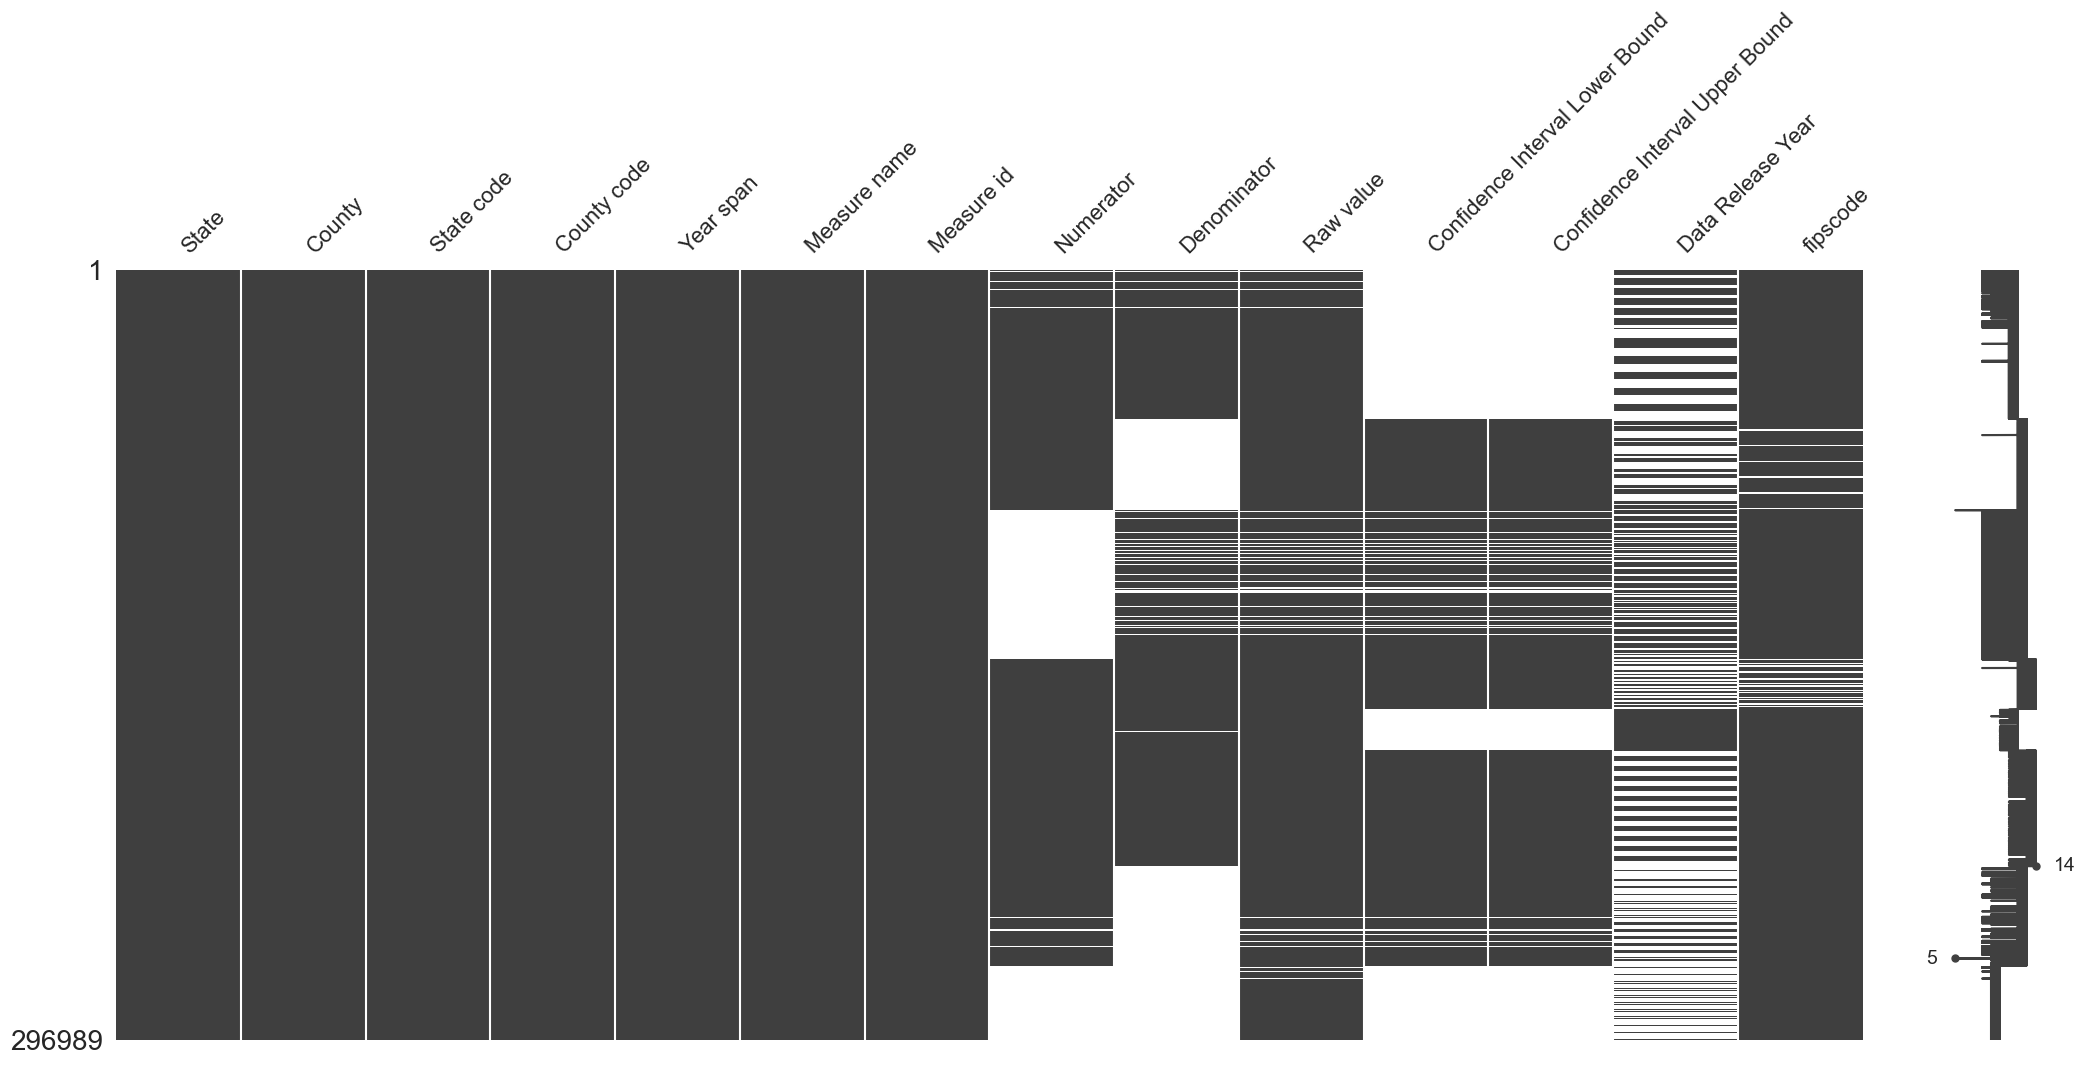

In [16]:
msno.matrix(df)

# Analsis of messing values
Here the visualization shows that for the columns (State, County, State code, County code, Year span, Measure name, Measure id) which have a minor munber of missing values that it's MCAR.
But it's not the case for the colums (Numerator, Denominator, Raw value, Confidence Interval Lower Bound, Confidence Interval Upper Bound) where it looks like there's a pattern or dependacy in the messing values like ther's some factor for it so it's MNAR.
And for the colomns (fipscode, data realese year) it's MAR because for the column data releas year the values are messing just because it wasn't measured for like 50 % of the values and it's not actually significat in the analysis process.

<Axes: >

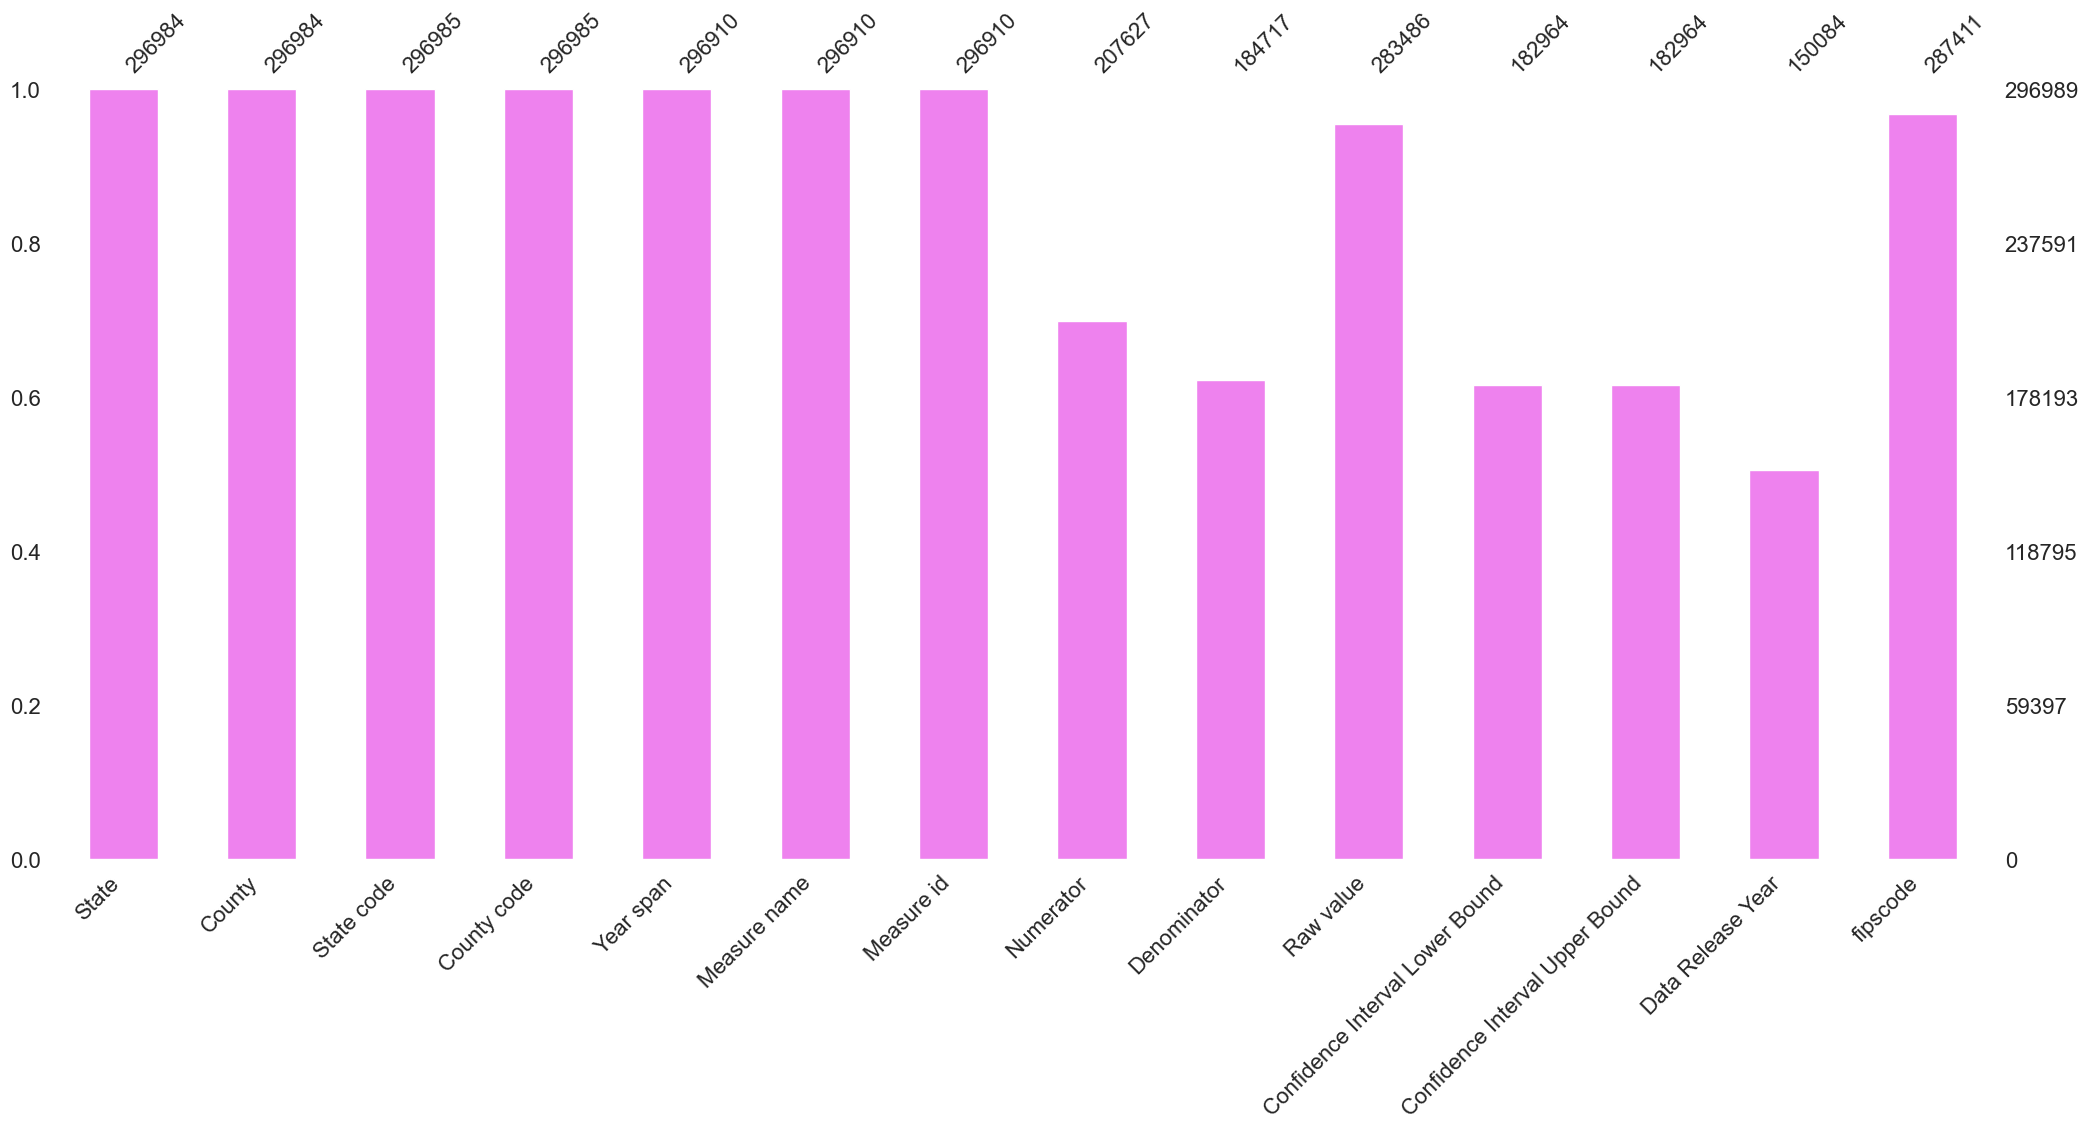

In [17]:
msno.bar(df, color = 'violet')

In [18]:
# dropping the rows with null values in specific columns since they are less than 1% from the data
df.dropna(subset = ['County', 'State', 'State code', 'County code','Year span', 'Measure name', 'Measure id'], inplace = True)

#filling the missing values in 'Raw value' and 'Numerator' and 'Denominator' with the mean and 'fipscode' with the mode
df['Raw value'].fillna(df['Raw value'].median(), inplace = True)
df['Numerator'].fillna(df['Numerator'].median(), inplace = True)
df['Denominator'].fillna(df['Denominator'].median(), inplace = True)
df['fipscode'].fillna(df['fipscode'].mode()[0], inplace = True)

# dropping the columns with high percentage of null values and not useful for analysis
df = df.drop(columns = ['Confidence Interval Lower Bound', 'Confidence Interval Upper Bound', 'Data Release Year'])

df.isnull().sum()

State           0
County          0
State code      0
County code     0
Year span       0
Measure name    0
Measure id      0
Numerator       0
Denominator     0
Raw value       0
fipscode        0
dtype: int64

#  Strategy Used
First we dropped the missing values with % less than 1 % of the data.

Then we filled the missing numerical values with the median to bervent bais, and categorical messing values with the mode.

And finally we dropped the columns with high messing value % yet not segnificant for the analsis process

# Outliers


# Seperating Numerical & Categorical Columns

In [19]:
df.dtypes

State            object
County           object
State code       object
County code      object
Year span        object
Measure name     object
Measure id       object
Numerator       float64
Denominator     float64
Raw value       float64
fipscode        float64
dtype: object

In [20]:
# Converting the 'fipscode' column to object type it needs to be retransformed again after the filling of null values
df['fipscode'] = df['fipscode'].astype('object')

In [21]:
num_cols = df.select_dtypes(include = ['int64', 'float64'])
cat_cols = df.select_dtypes(include = ['object'])   

print(f"Numerical columns:\n{num_cols.columns}\n")
print(f"Categorical columns:\n{cat_cols.columns}\n")

Numerical columns:
Index(['Numerator', 'Denominator', 'Raw value'], dtype='object')

Categorical columns:
Index(['State', 'County', 'State code', 'County code', 'Year span',
       'Measure name', 'Measure id', 'fipscode'],
      dtype='object')



In [22]:
Q1 = num_cols.quantile(0.25)
Q2_MODE = num_cols.quantile(0.5)
Q3 = num_cols.quantile(0.75)   
IQR = Q3 - Q1

In [23]:
outliers = (num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
print(outliers_count)

Numerator      44998
Denominator    49918
Raw value      54895
dtype: int64


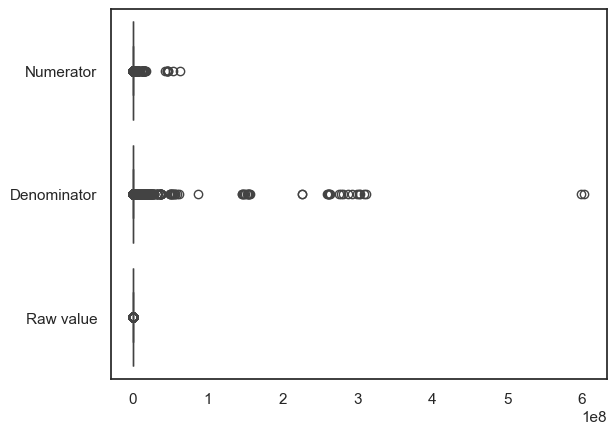

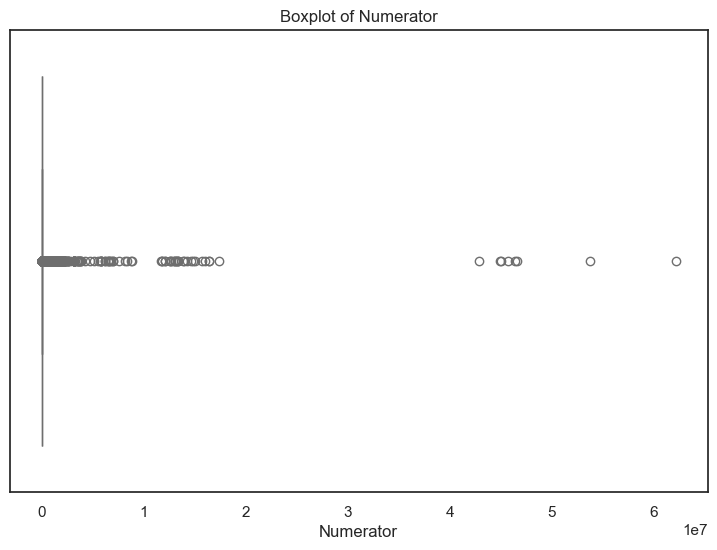

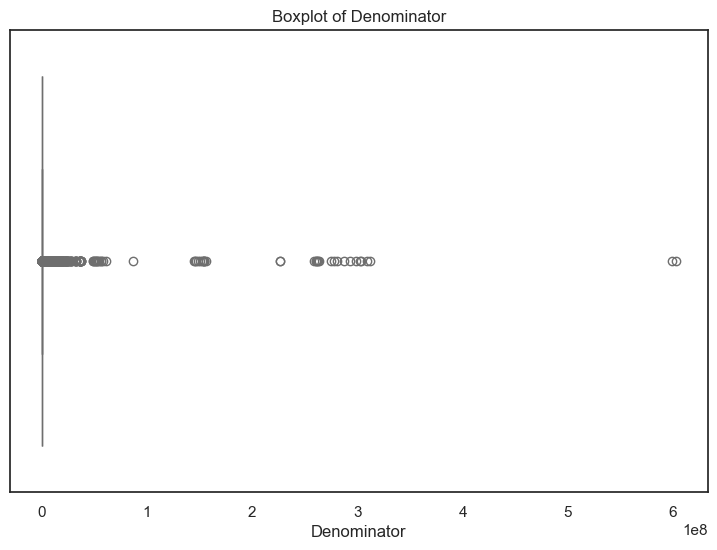

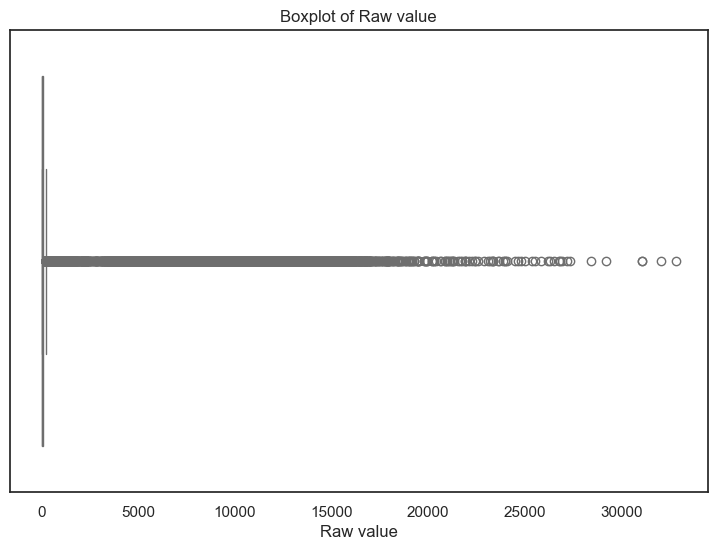

In [24]:
sns.boxplot(data = num_cols, orient = 'h', palette = 'PuRd')

for col in num_cols.columns:
    plt.figure(figsize = (9, 6))
    sns.boxplot(x = num_cols[col], color = 'violet')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Conclusion
In this data we shall not drop the outliers since it's reasonable it makes since it reflects differences in population size and health outcomes across U.S. counties. so could try somthing like Log transformation


# Log Transformation

In [25]:
df['Log Numerator'] = np.log(df['Numerator'])
df['Log Denominator'] = np.log(df['Denominator'])
df['Log Raw value'] = np.log(df['Raw value'])
df.head()

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,Log Numerator,Log Denominator,Log Raw value
0,US,United States,0.0,0.0,2003-2005,Violent crime rate,43.0,1328750.667,274877117.0,483.398066,0.0,14.099750,19.431835,6.180840
1,US,United States,0.0,0.0,2004-2006,Violent crime rate,43.0,1340928.667,277612778.5,483.021233,0.0,14.108873,19.441738,6.180061
2,US,United States,0.0,0.0,2005-2007,Violent crime rate,43.0,1355853.167,280407694.7,483.529230,0.0,14.119941,19.451755,6.181112
3,US,United States,0.0,0.0,2006-2008,Violent crime rate,43.0,1366928.333,287614567.7,475.263942,0.0,14.128077,19.477132,6.163870
4,US,United States,0.0,0.0,2007-2009,Violent crime rate,43.0,1339439.333,292576281.2,457.808585,0.0,14.107762,19.494236,6.126451


In [26]:
sample_df = df.sample(90000, random_state = 42)

In [27]:
pairs = [
    ("Numerator", "Log Numerator"),
    ("Denominator", "Log Denominator"),
    ("Raw value", "Log Raw value")
]

# Hist Plot for Numerical Features

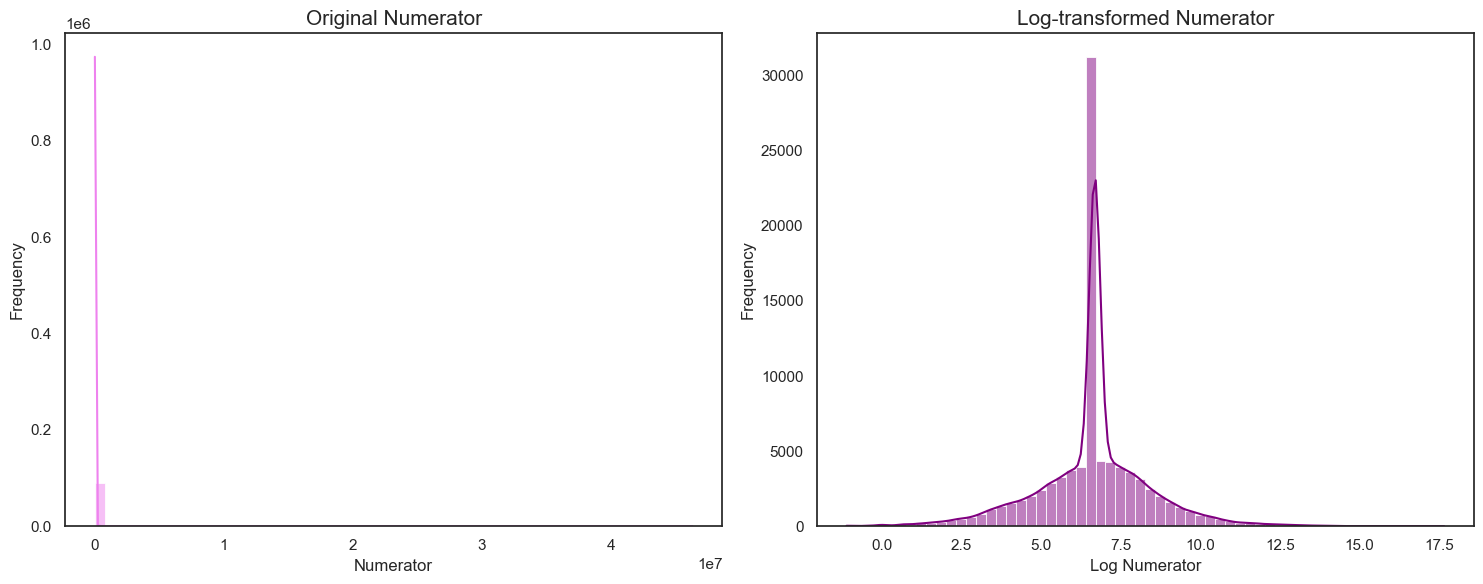

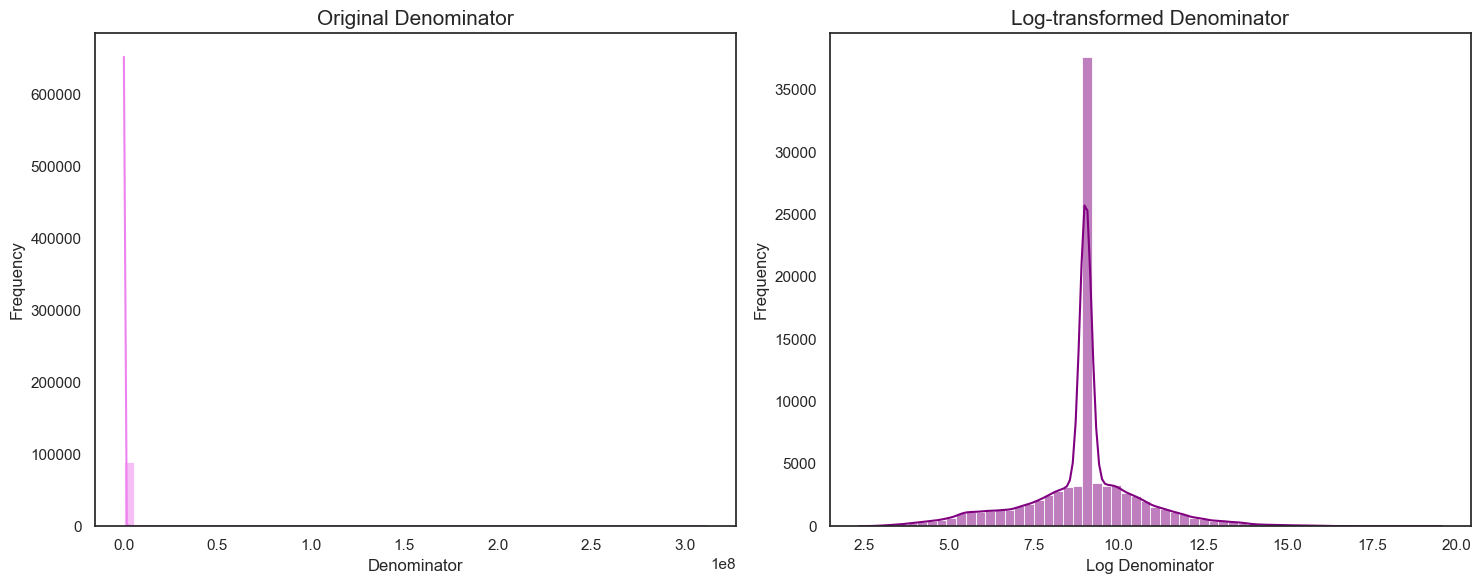

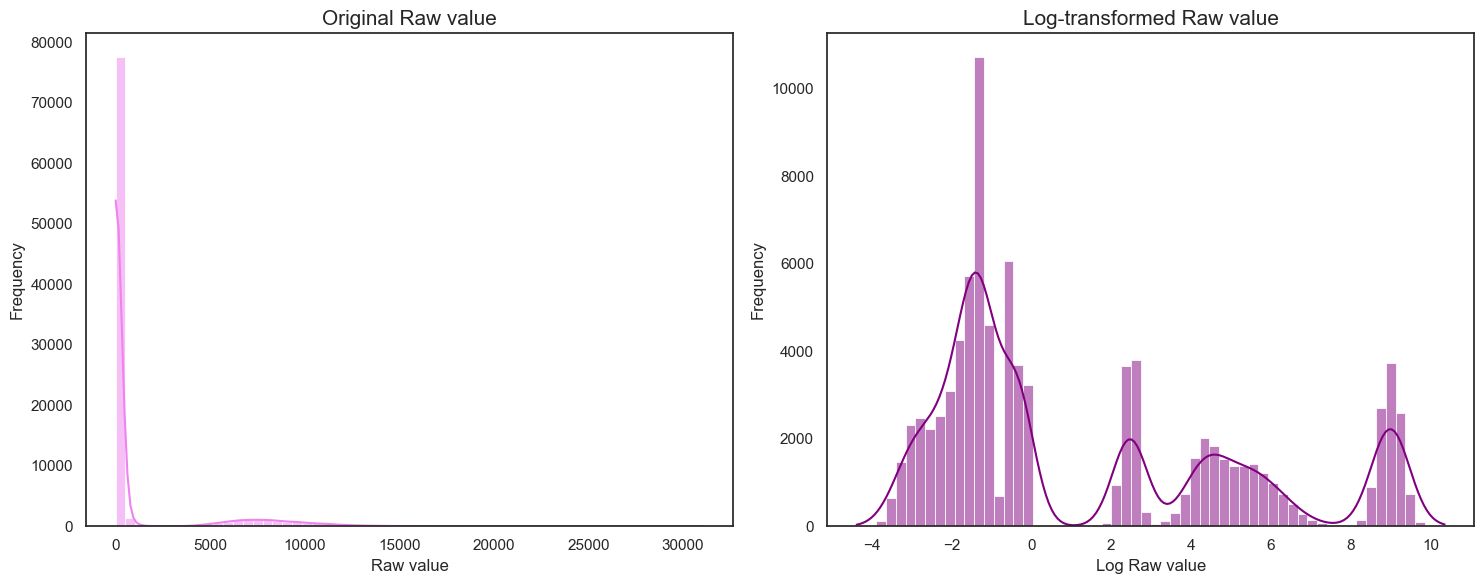

In [28]:
for orig, log in pairs:
    plt.figure(figsize = (15,6))

    # Original column
    plt.subplot(1,2,1)
    sns.histplot(sample_df[orig], kde = True, bins = 60, color = "violet")
    plt.title(f"Original {orig}", fontsize = 15)
    plt.xlabel(orig)
    plt.ylabel("Frequency")

    # Log-transformed column
    plt.subplot(1,2,2)
    sns.histplot(sample_df[log], kde = True, bins = 60, color = "Purple")
    plt.title(f"Log-transformed {orig}", fontsize = 15)
    plt.xlabel(log)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Box plot For numerical features

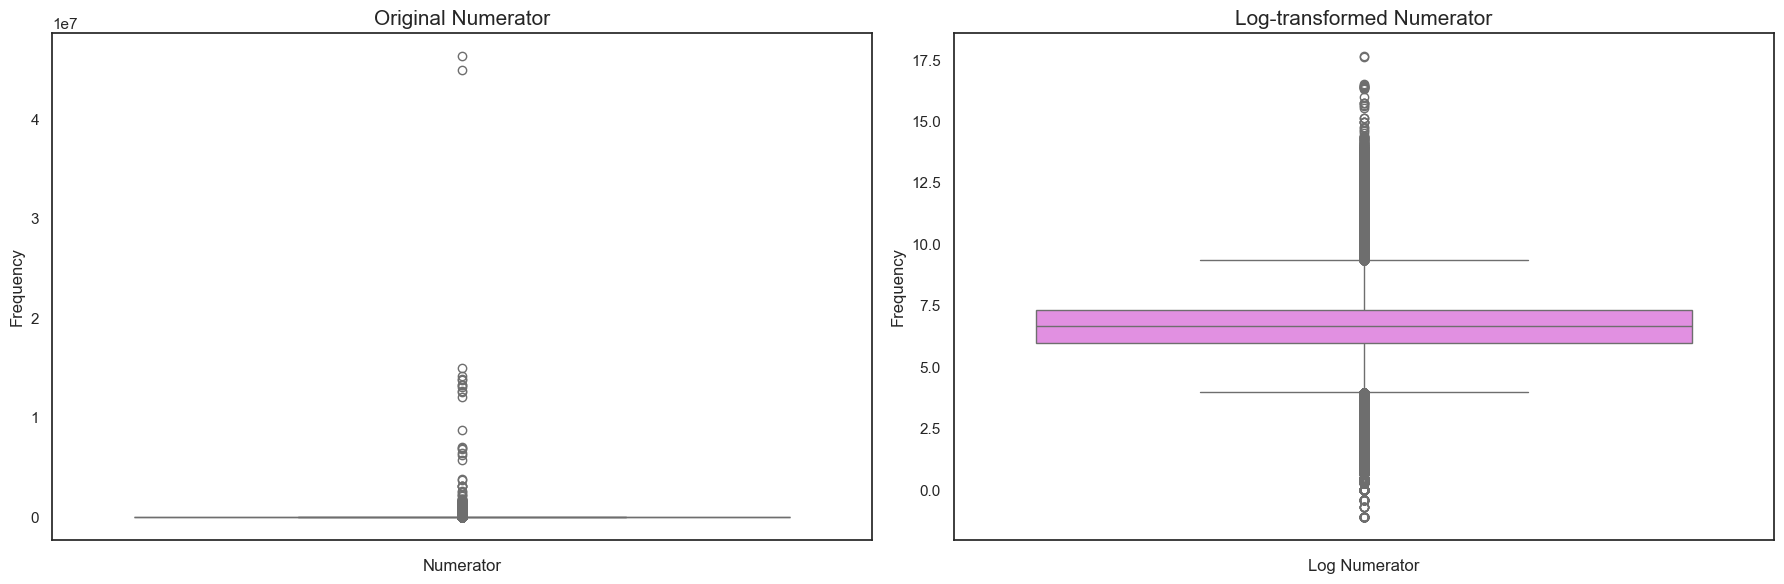

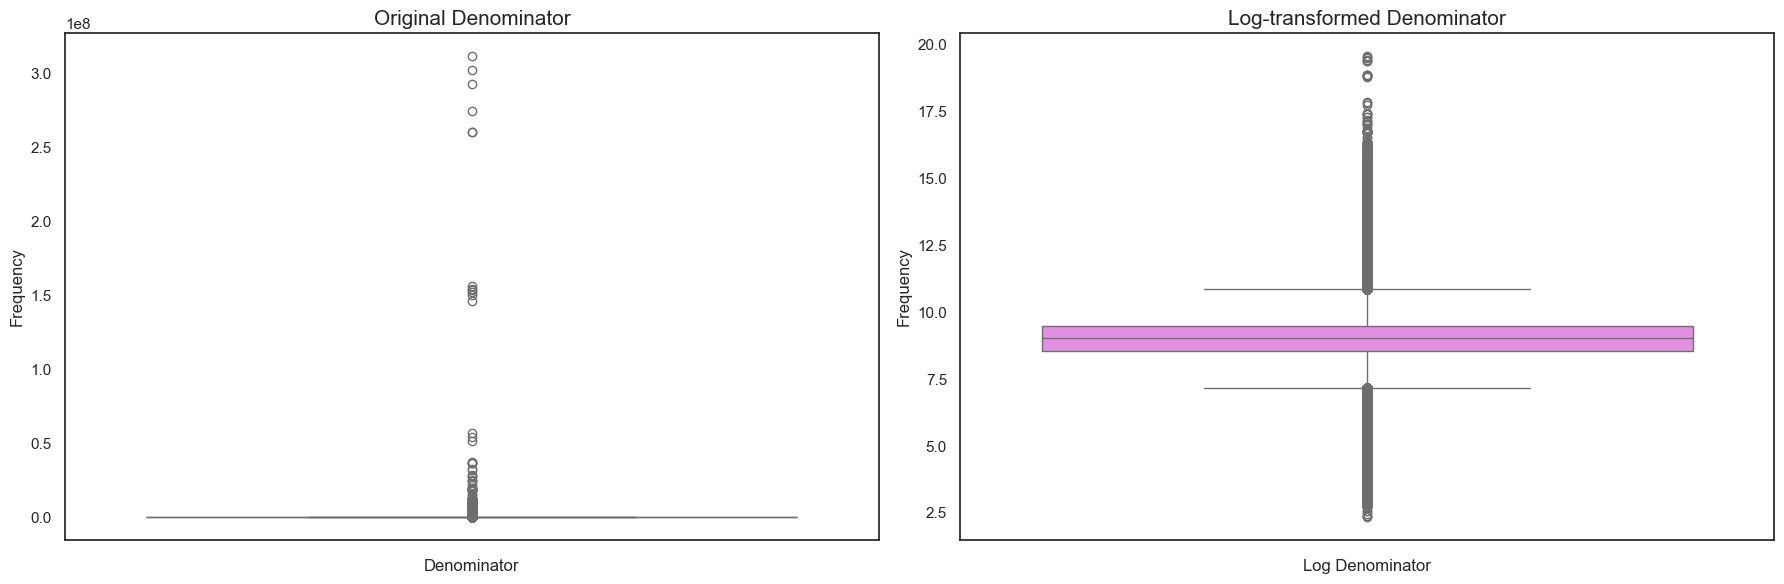

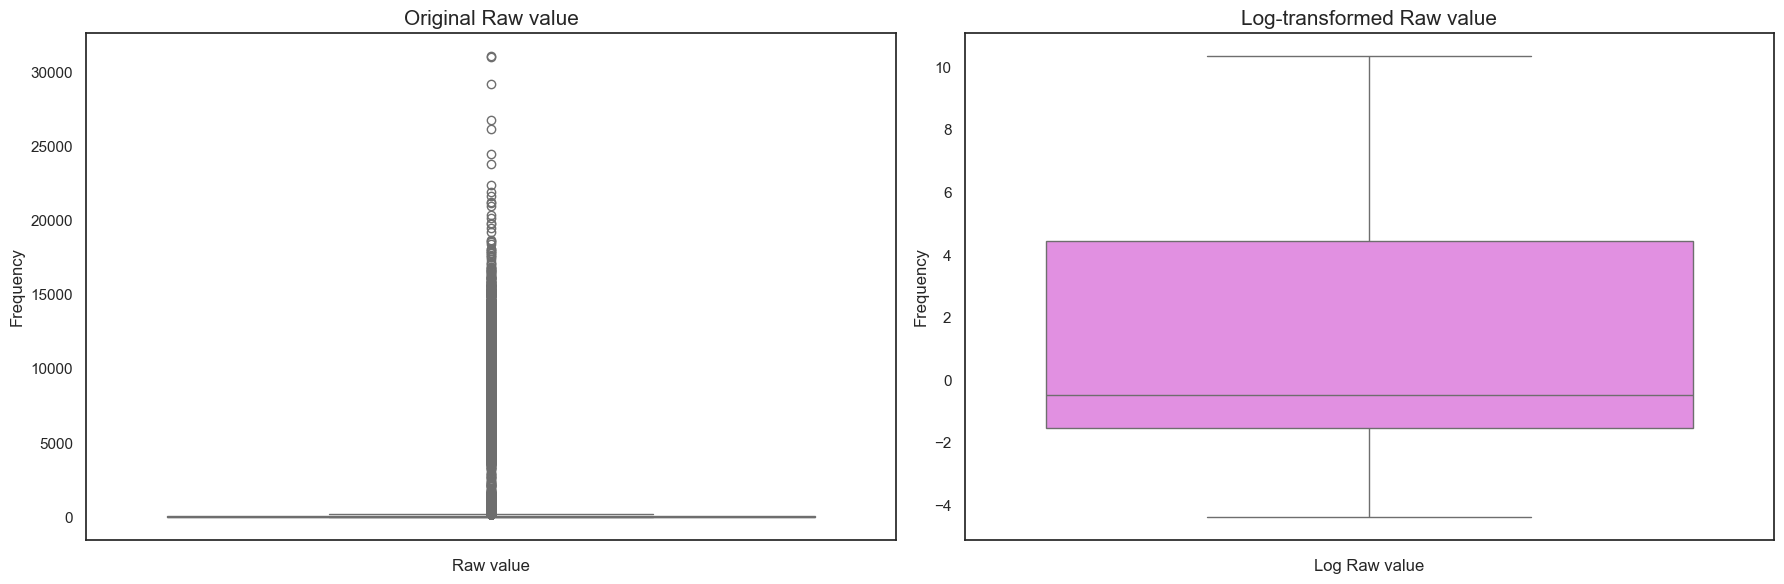

In [29]:
for orig, log in pairs:
    plt.figure(figsize = (18,6))

    # Original column
    plt.subplot(1,2,1)
    sns.boxplot(sample_df[orig], color = "violet")
    plt.title(f"Original {orig}", fontsize = 15)
    plt.xlabel(orig)
    plt.ylabel("Frequency")

    # Log-transformed column
    plt.subplot(1,2,2)
    sns.boxplot(sample_df[log], color = "violet")
    plt.title(f"Log-transformed {orig}", fontsize = 15)
    plt.xlabel(log)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Conclusion 
Here after the tarnsformation we could see that the log trasformed colomns are more closer to the normal distribution

# EDA Process

Box blot and hist blot for numerical columns done in the previous cells

# Ctegorical Featutrs Visualization

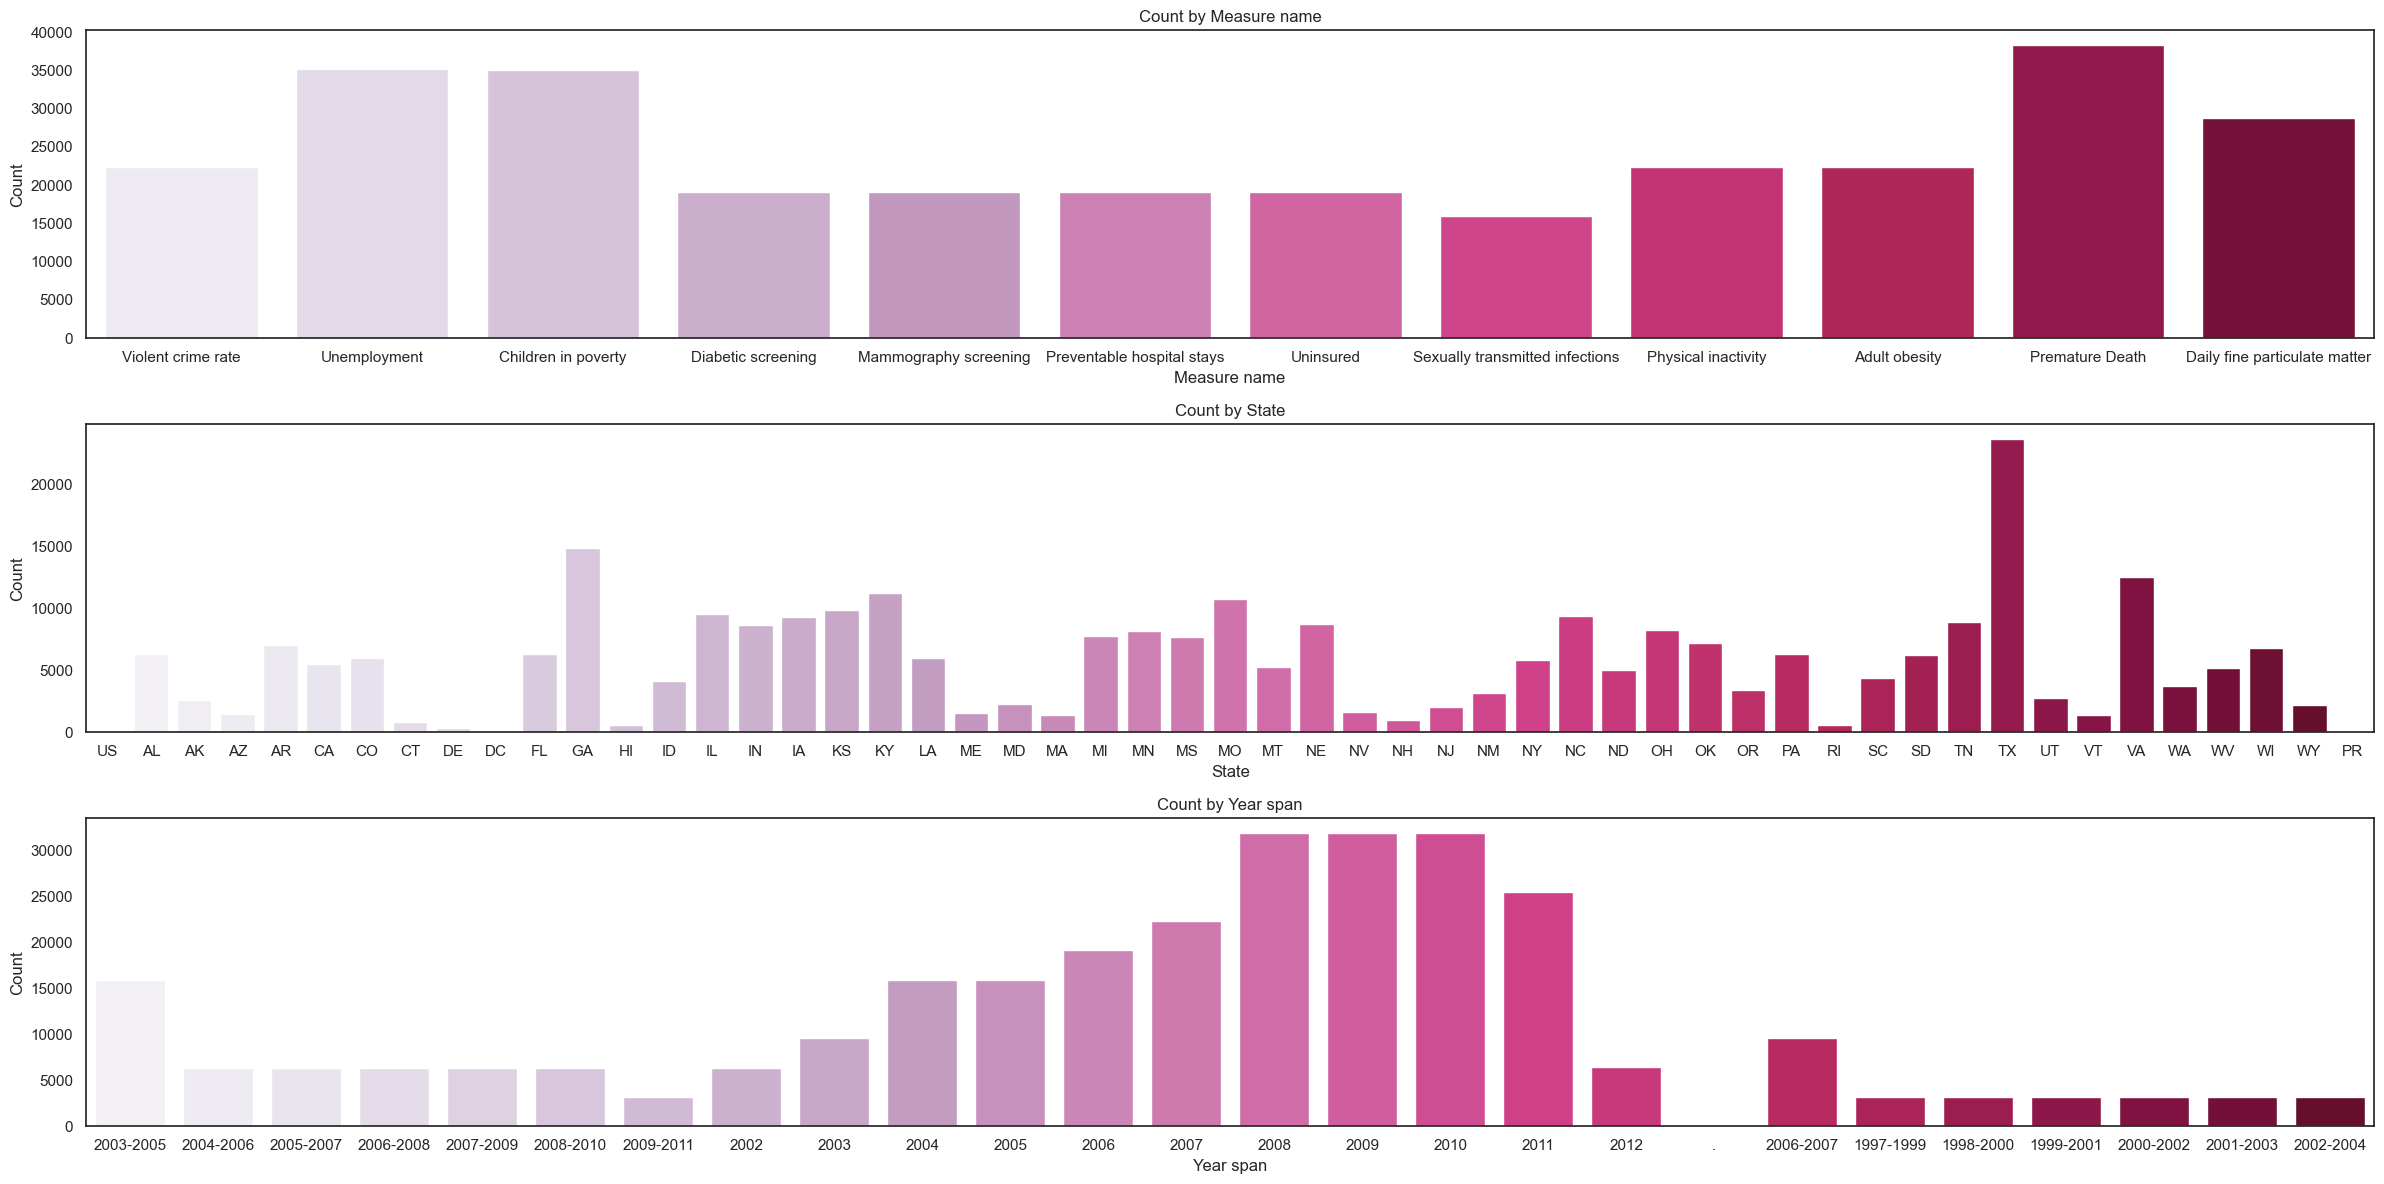

In [30]:
plt.figure(figsize = (24, 12))

plt.subplot(3,1,1)
sns.countplot(x = 'Measure name', data = df, palette = 'PuRd')
plt.title('Count by Measure name')
plt.xlabel('Measure name')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(3,1,2)
sns.countplot(x = 'State', data = df, palette = 'PuRd')
plt.title('Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(3,1,3)
sns.countplot(x = 'Year span', data = df, palette = 'PuRd')
plt.title('Count by Year span')
plt.xlabel('Year span')
plt.ylabel('Count')
plt.tight_layout()

plt.show()


# Numerical vs Numerical

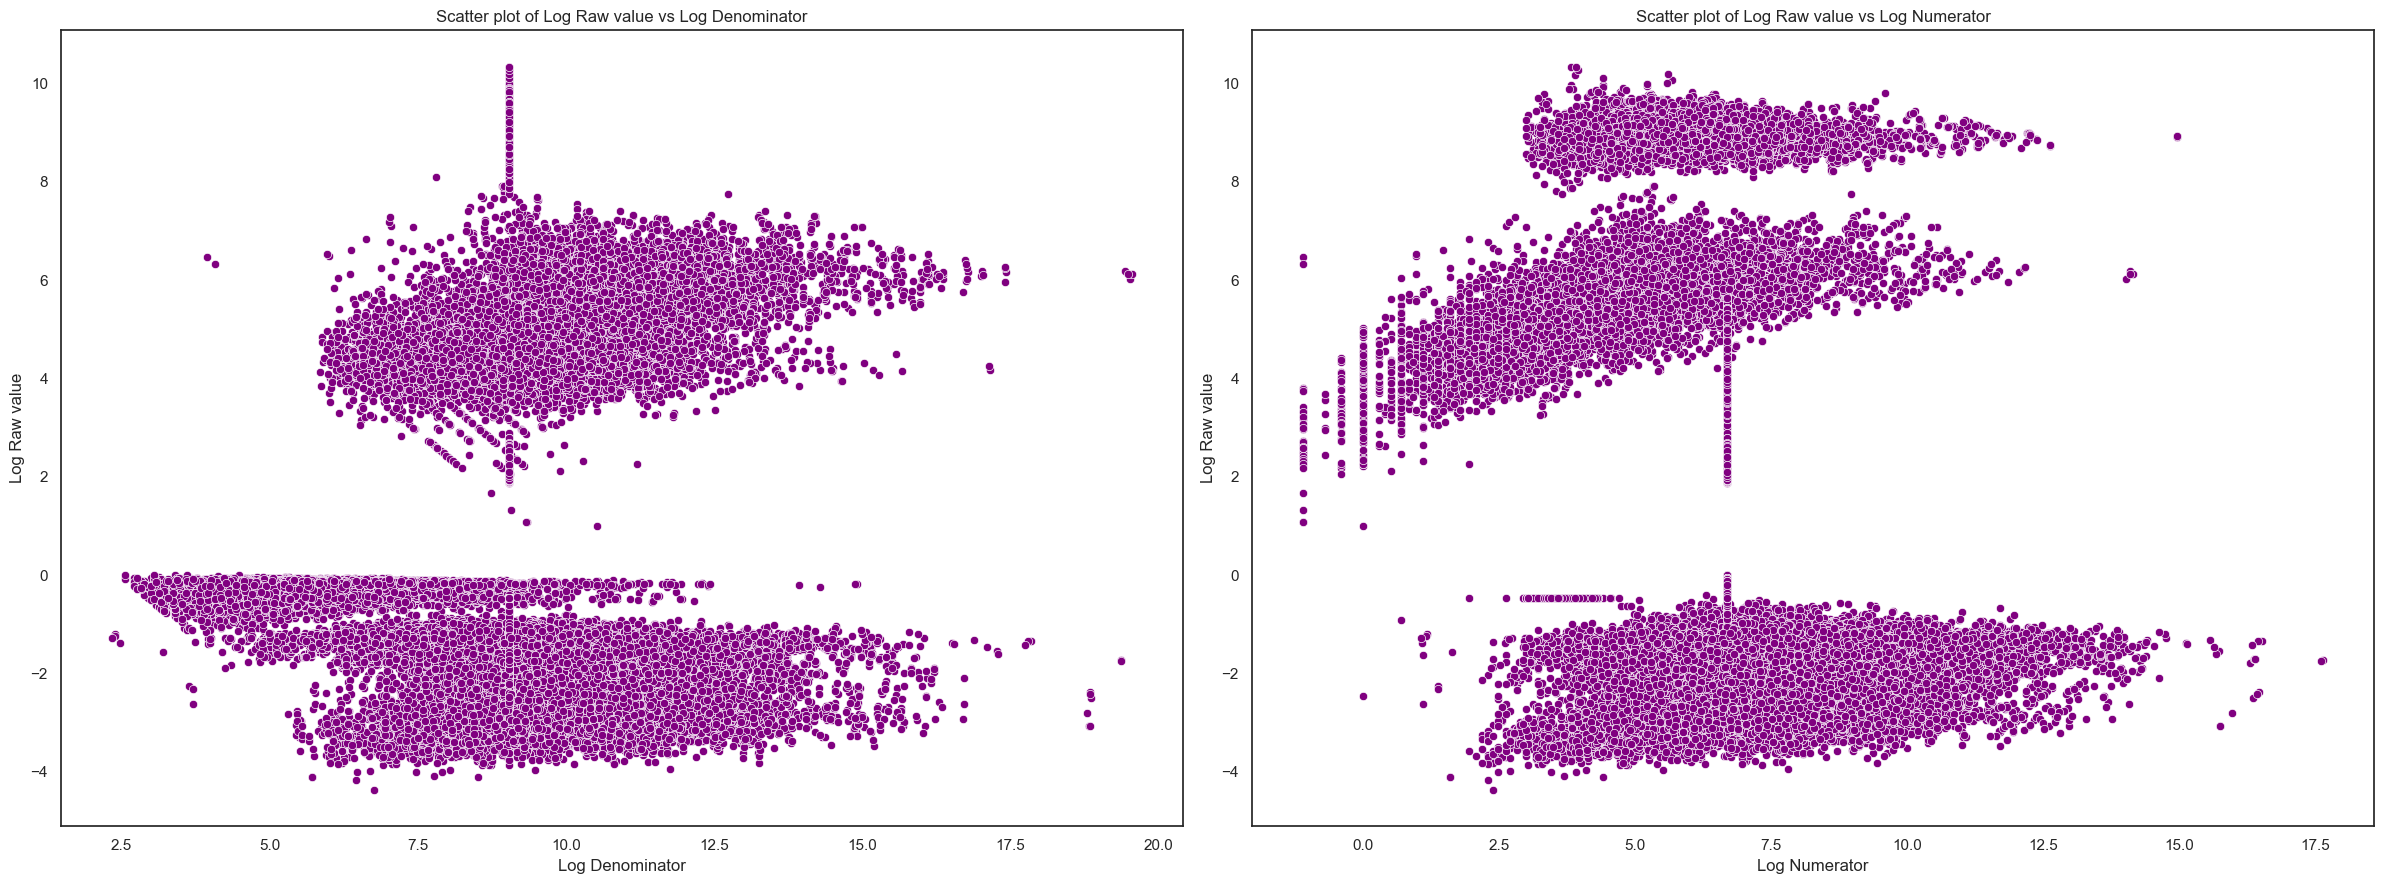

In [31]:
plt.figure(figsize = (24, 9))

plt.subplot(1,2,1)
sns.scatterplot(x = 'Log Denominator', y = 'Log Raw value', data = sample_df, color = 'purple')
plt.title('Scatter plot of Log Raw value vs Log Denominator')
plt.xlabel('Log Denominator')
plt.ylabel('Log Raw value')
plt.tight_layout()

plt.subplot(1,2,2)
sns.scatterplot(x = 'Log Numerator', y = 'Log Raw value', data = sample_df, color = 'purple')
plt.title('Scatter plot of Log Raw value vs Log Numerator')
plt.xlabel('Log Numerator')
plt.ylabel('Log Raw value')
plt.tight_layout()

plt.show()

#  Catigorical vs Catigorical

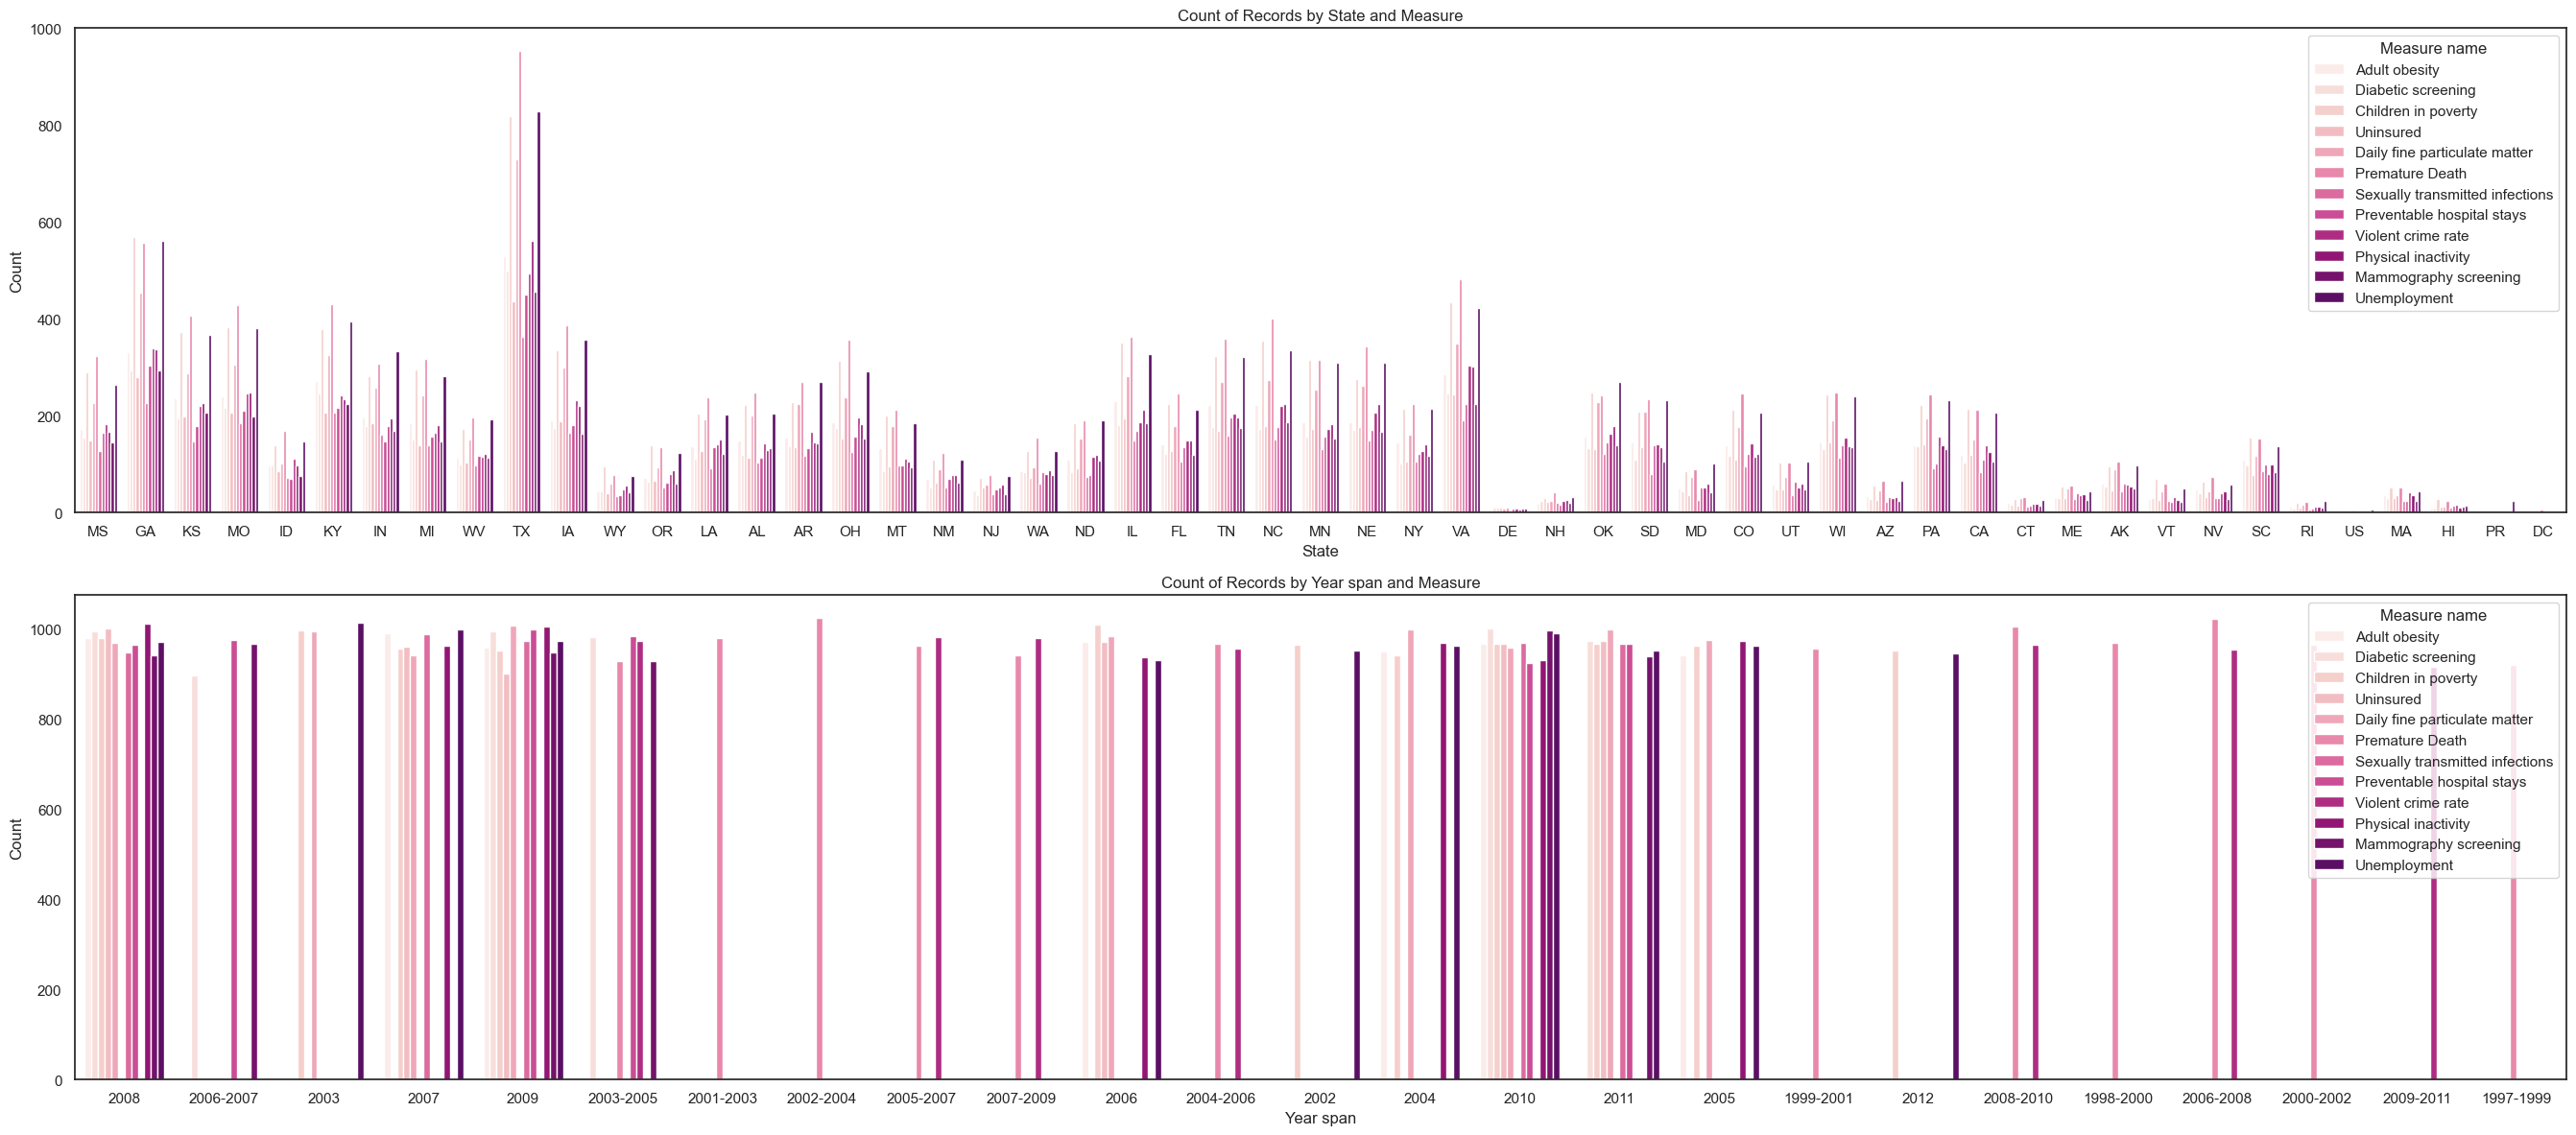

In [32]:
plt.figure(figsize = (27, 12))

plt.subplot(2,1,1)
sns.countplot(x = 'State', hue = 'Measure name', data = sample_df, palette = 'RdPu')
plt.title('Count of Records by State and Measure')
plt.xlabel('State')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(2,1,2)
sns.countplot(x = 'Year span', hue = 'Measure name' , data = sample_df, palette = 'RdPu')
plt.title('Count of Records by Year span and Measure')
plt.xlabel('Year span')
plt.ylabel('Count') 
plt.tight_layout()

plt.show()

# Numerical vs Catigorical 

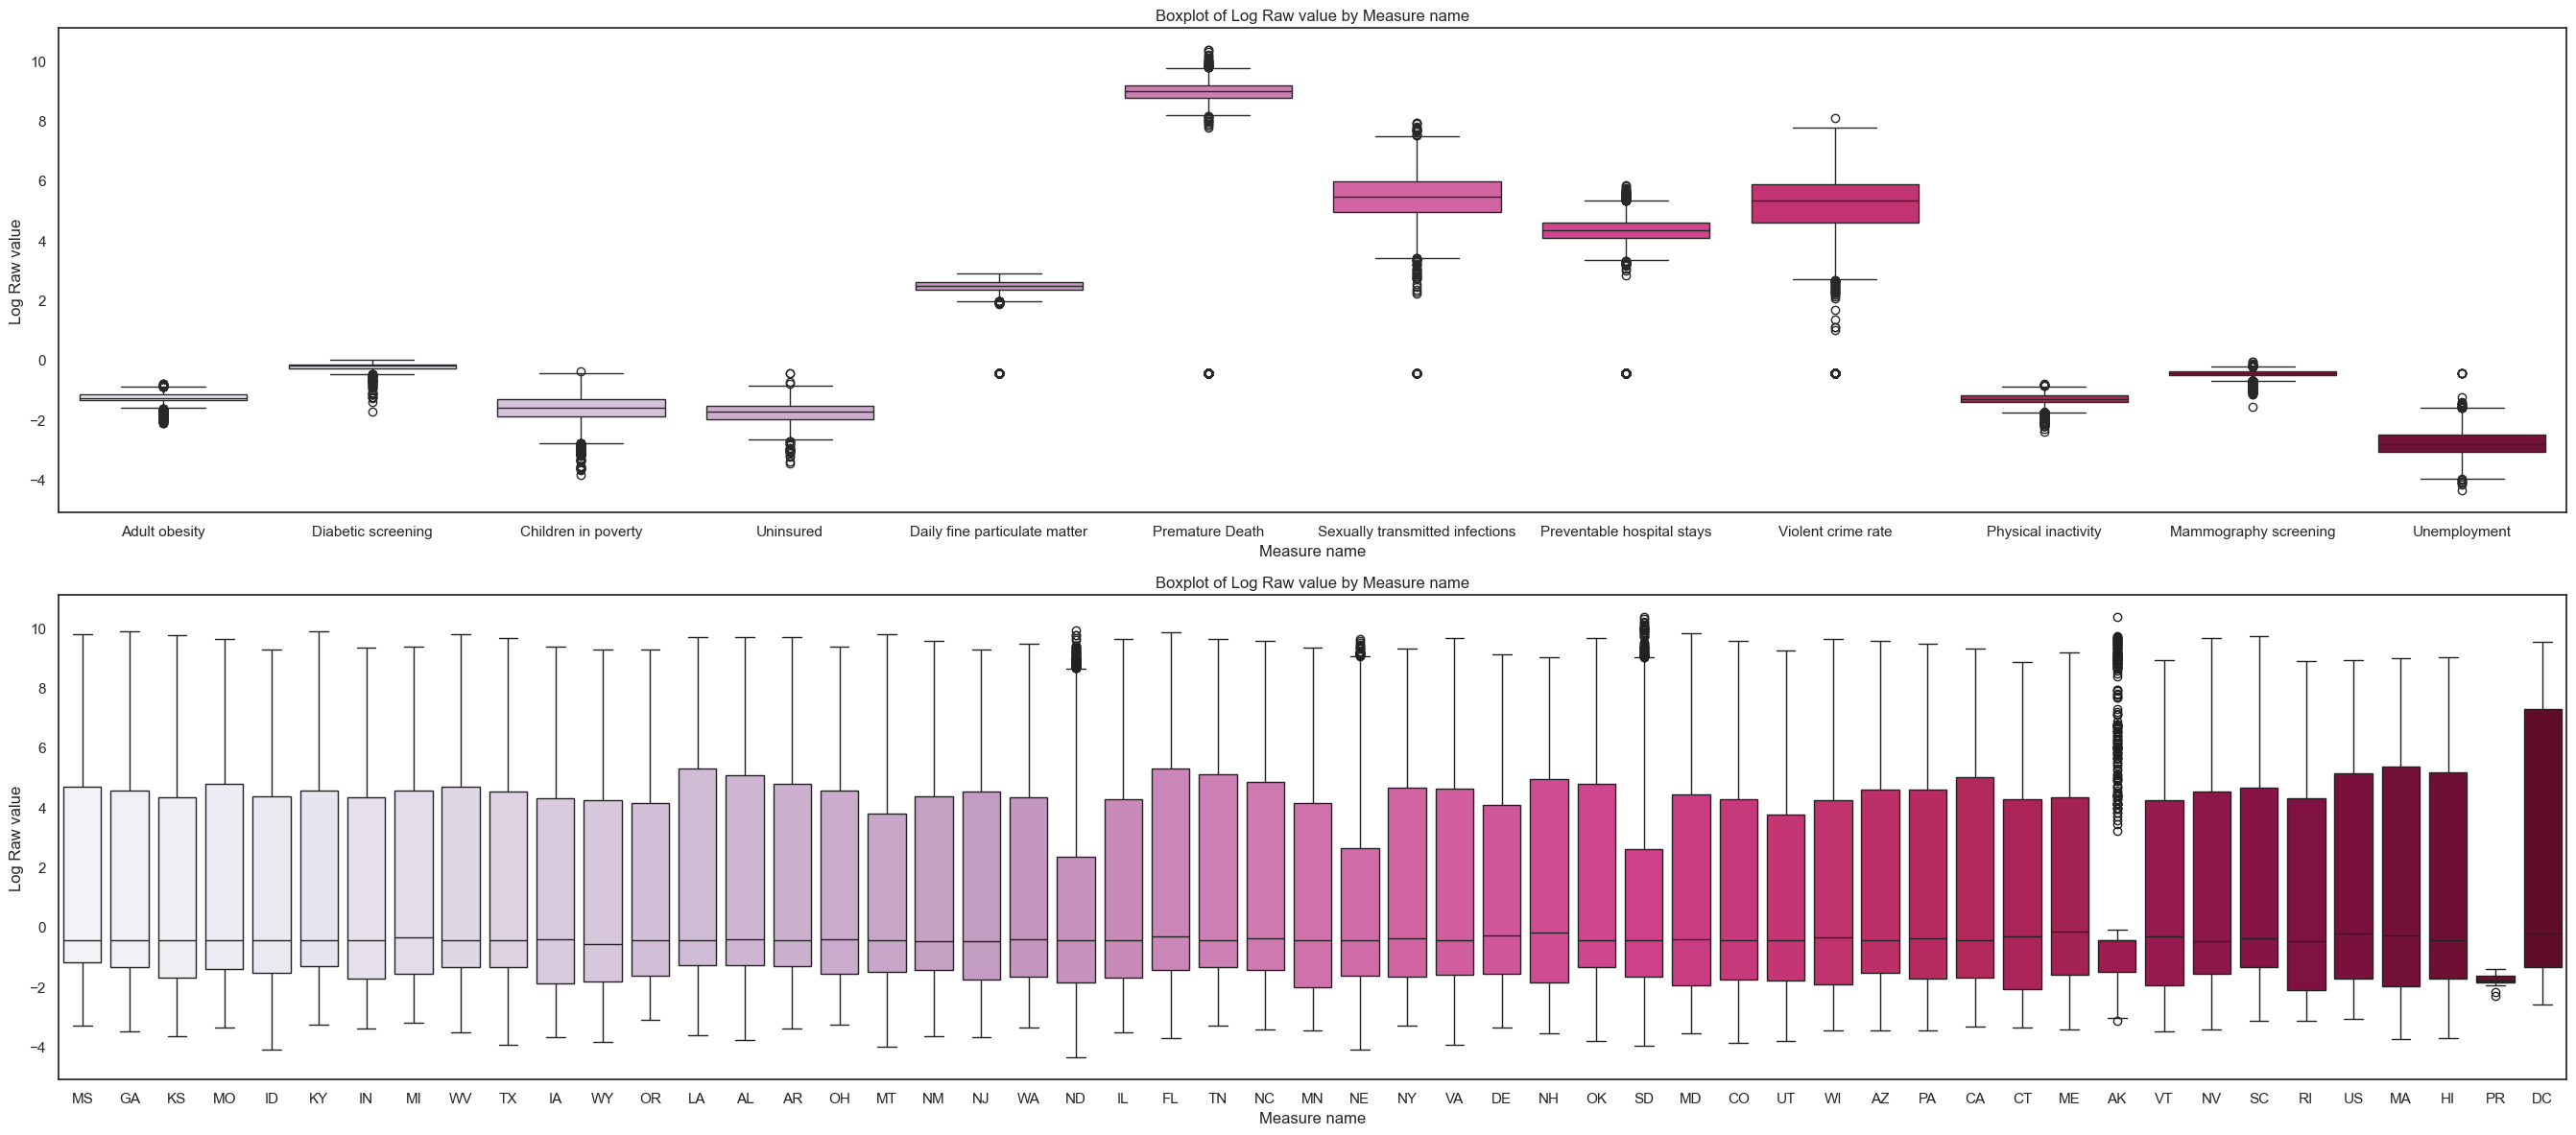

In [33]:
plt.figure(figsize = (27, 12))

plt.subplot(2,1,1)
sns.boxplot(x = 'Measure name', y = 'Log Raw value', data = sample_df, palette = 'PuRd')
plt.title('Boxplot of Log Raw value by Measure name')
plt.xlabel('Measure name')
plt.ylabel('Log Raw value')
plt.tight_layout()

plt.subplot(2,1,2)
sns.boxplot(x = 'State', y = 'Log Raw value', data = sample_df, palette = 'PuRd')
plt.title('Boxplot of Log Raw value by Measure name')
plt.xlabel('Measure name')
plt.ylabel('Log Raw value')
plt.tight_layout()

plt.show()

# Feature Correlation

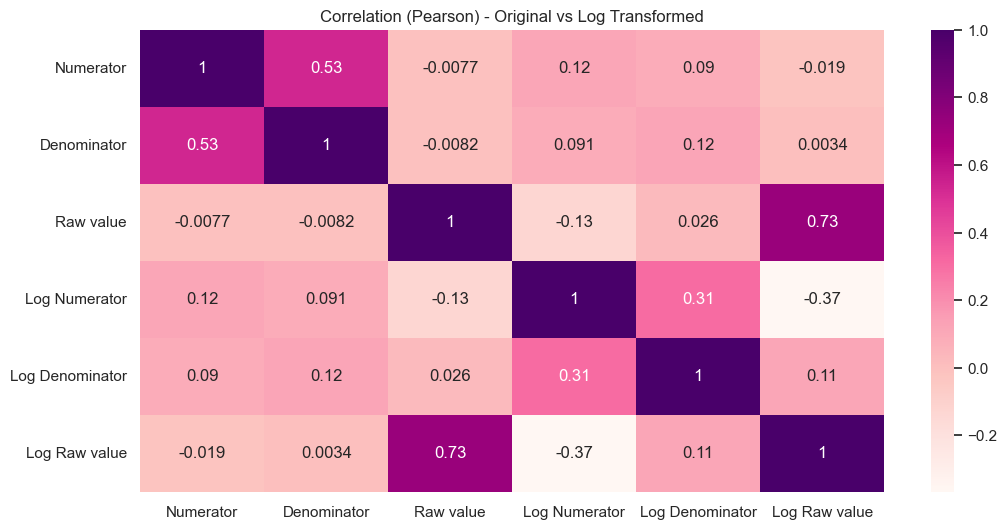

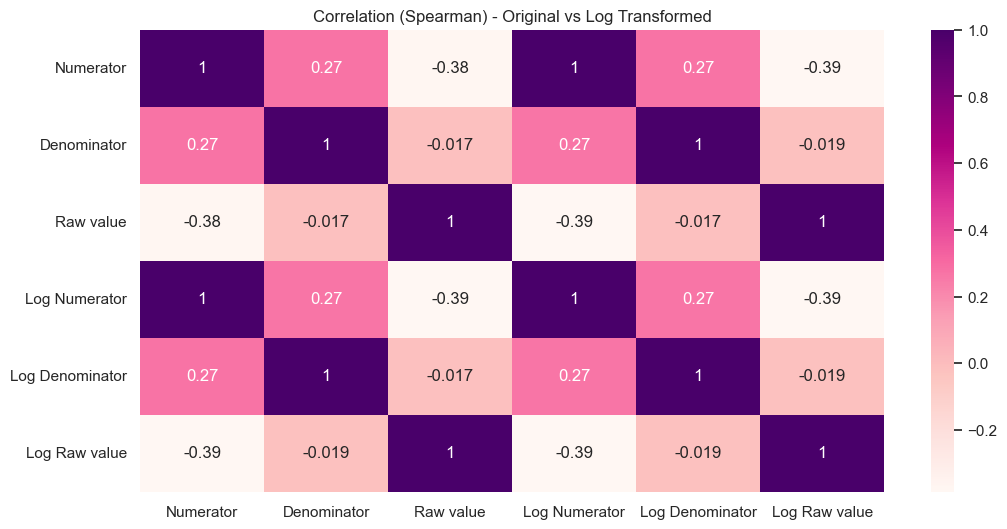

In [34]:
corr_cols = ['Numerator', 'Denominator', 'Raw value',
             'Log Numerator', 'Log Denominator', 'Log Raw value']
# Pearson correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df[corr_cols].corr(method = 'pearson'), annot = True, cmap = 'RdPu')
plt.title("Correlation (Pearson) - Original vs Log Transformed")
plt.show()

# Spearman correlation
plt.figure(figsize = (12, 6))
sns.heatmap(df[corr_cols].corr(method = 'spearman'), annot = True, cmap = 'RdPu')
plt.title("Correlation (Spearman) - Original vs Log Transformed")
plt.show()

# Insights


There's a +ve corr between the numerator and the denomerator and a -ve relation between both the numeratot nad the denomerator and the raw value

The log transformed features show stronger and more linear correlations compared to the raw features, which confirms that log transformation reduced skewness and stabilized varianc

# Summary Coclusion
In this EDA, the County Health Rankings dataset was cleaned, missing values analyzed, and variables transformed where necessary.

Data Cleaning: Removed duplicates, dropped non significant columns and handled missing values.

Missing Data: Some variables were MAR while others were MAR, and others were MnAR.

Univariate Analysis: Numerical features were highly skewed but improved after log transformation.

Bivariate Analysis: Numerator and Denominator were strongly correlated Raw value varied significantly across measures and states.

Correlation: positive relationship between Numerator & Denominator and the log transformation enhanced linearity.

Key Insight: Population size (Numerator/Denominator) drives many relationships, and log transformation improved data quality for analysis.